# Cleaning Movie Dataset

In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
movie = pd.read_csv('movie.csv')
print(movie.shape)
movie.tail()

(9125, 3)


,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


In [3]:
ratings = pd.read_csv('ratings.csv')
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## merging the movie and ratings dataset

In [4]:
data = pd.merge(movie, ratings, on = 'movieId', how = 'inner')
print(data.shape)
data.head()

(96811, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [5]:
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)
data.tail()

,title,genres,rating
96806,Hell or High Water (2016),Crime|Drama,4.0
96807,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,3.5
96808,Body (2015),Drama|Horror|Thriller,1.0
96809,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,1.5
96810,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,4.0


In [10]:
# groupby the table based on movie title

data = pd.pivot_table(data, index = ['title', 'genres'], aggfunc = 'mean')
print(data.head())
data.reset_index(level = ['title', 'genres'], inplace = True)
data.head()

                                                                                       rating  \
title                                   genres                                                  
'Hellboy': The Seeds of Creation (2004) Action|Adventure|Comedy|Documentary|Fantasy  4.000000   
'Round Midnight (1986)                  Drama|Musical                                3.500000   
'Salem's Lot (2004)                     Drama|Horror|Mystery|Thriller                5.000000   
'Til There Was You (1997)               Drama|Romance                                4.000000   
'burbs, The (1989)                      Comedy                                       3.176471   

                                                                                     year  
title                                   genres                                             
'Hellboy': The Seeds of Creation (2004) Action|Adventure|Comedy|Documentary|Fantasy  2004  
'Round Midnight (1986)                  Dram

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


C:\Users\claim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


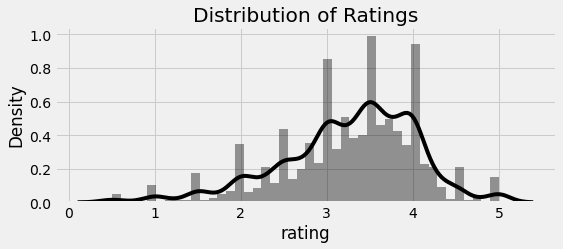

In [7]:
plt.rcParams['figure.figsize'] = (8, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

## Cleaning the year column

In [8]:
data['year'] = data['title'].str.split(' ')
data['year'] = data['year'].apply(lambda x: x[-1])
data['year'] = data['year'].str.strip('(')
data['year'] = data['year'].str.strip(')')
pd.set_option('max_rows', 100)
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
       ... 
Road      1
1921      1
1915      1
1917      1
          1
Name: year, Length: 103, dtype: int64

In [9]:
data['year'] = (data['year'].replace(('2007-', 'Despot', 'Things', '1975-1979', 'Road', ''), ('2007', '2016', '2016', '1979', '2002', '1996'))).astype(int)
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989
